Generemos datos sintéticos

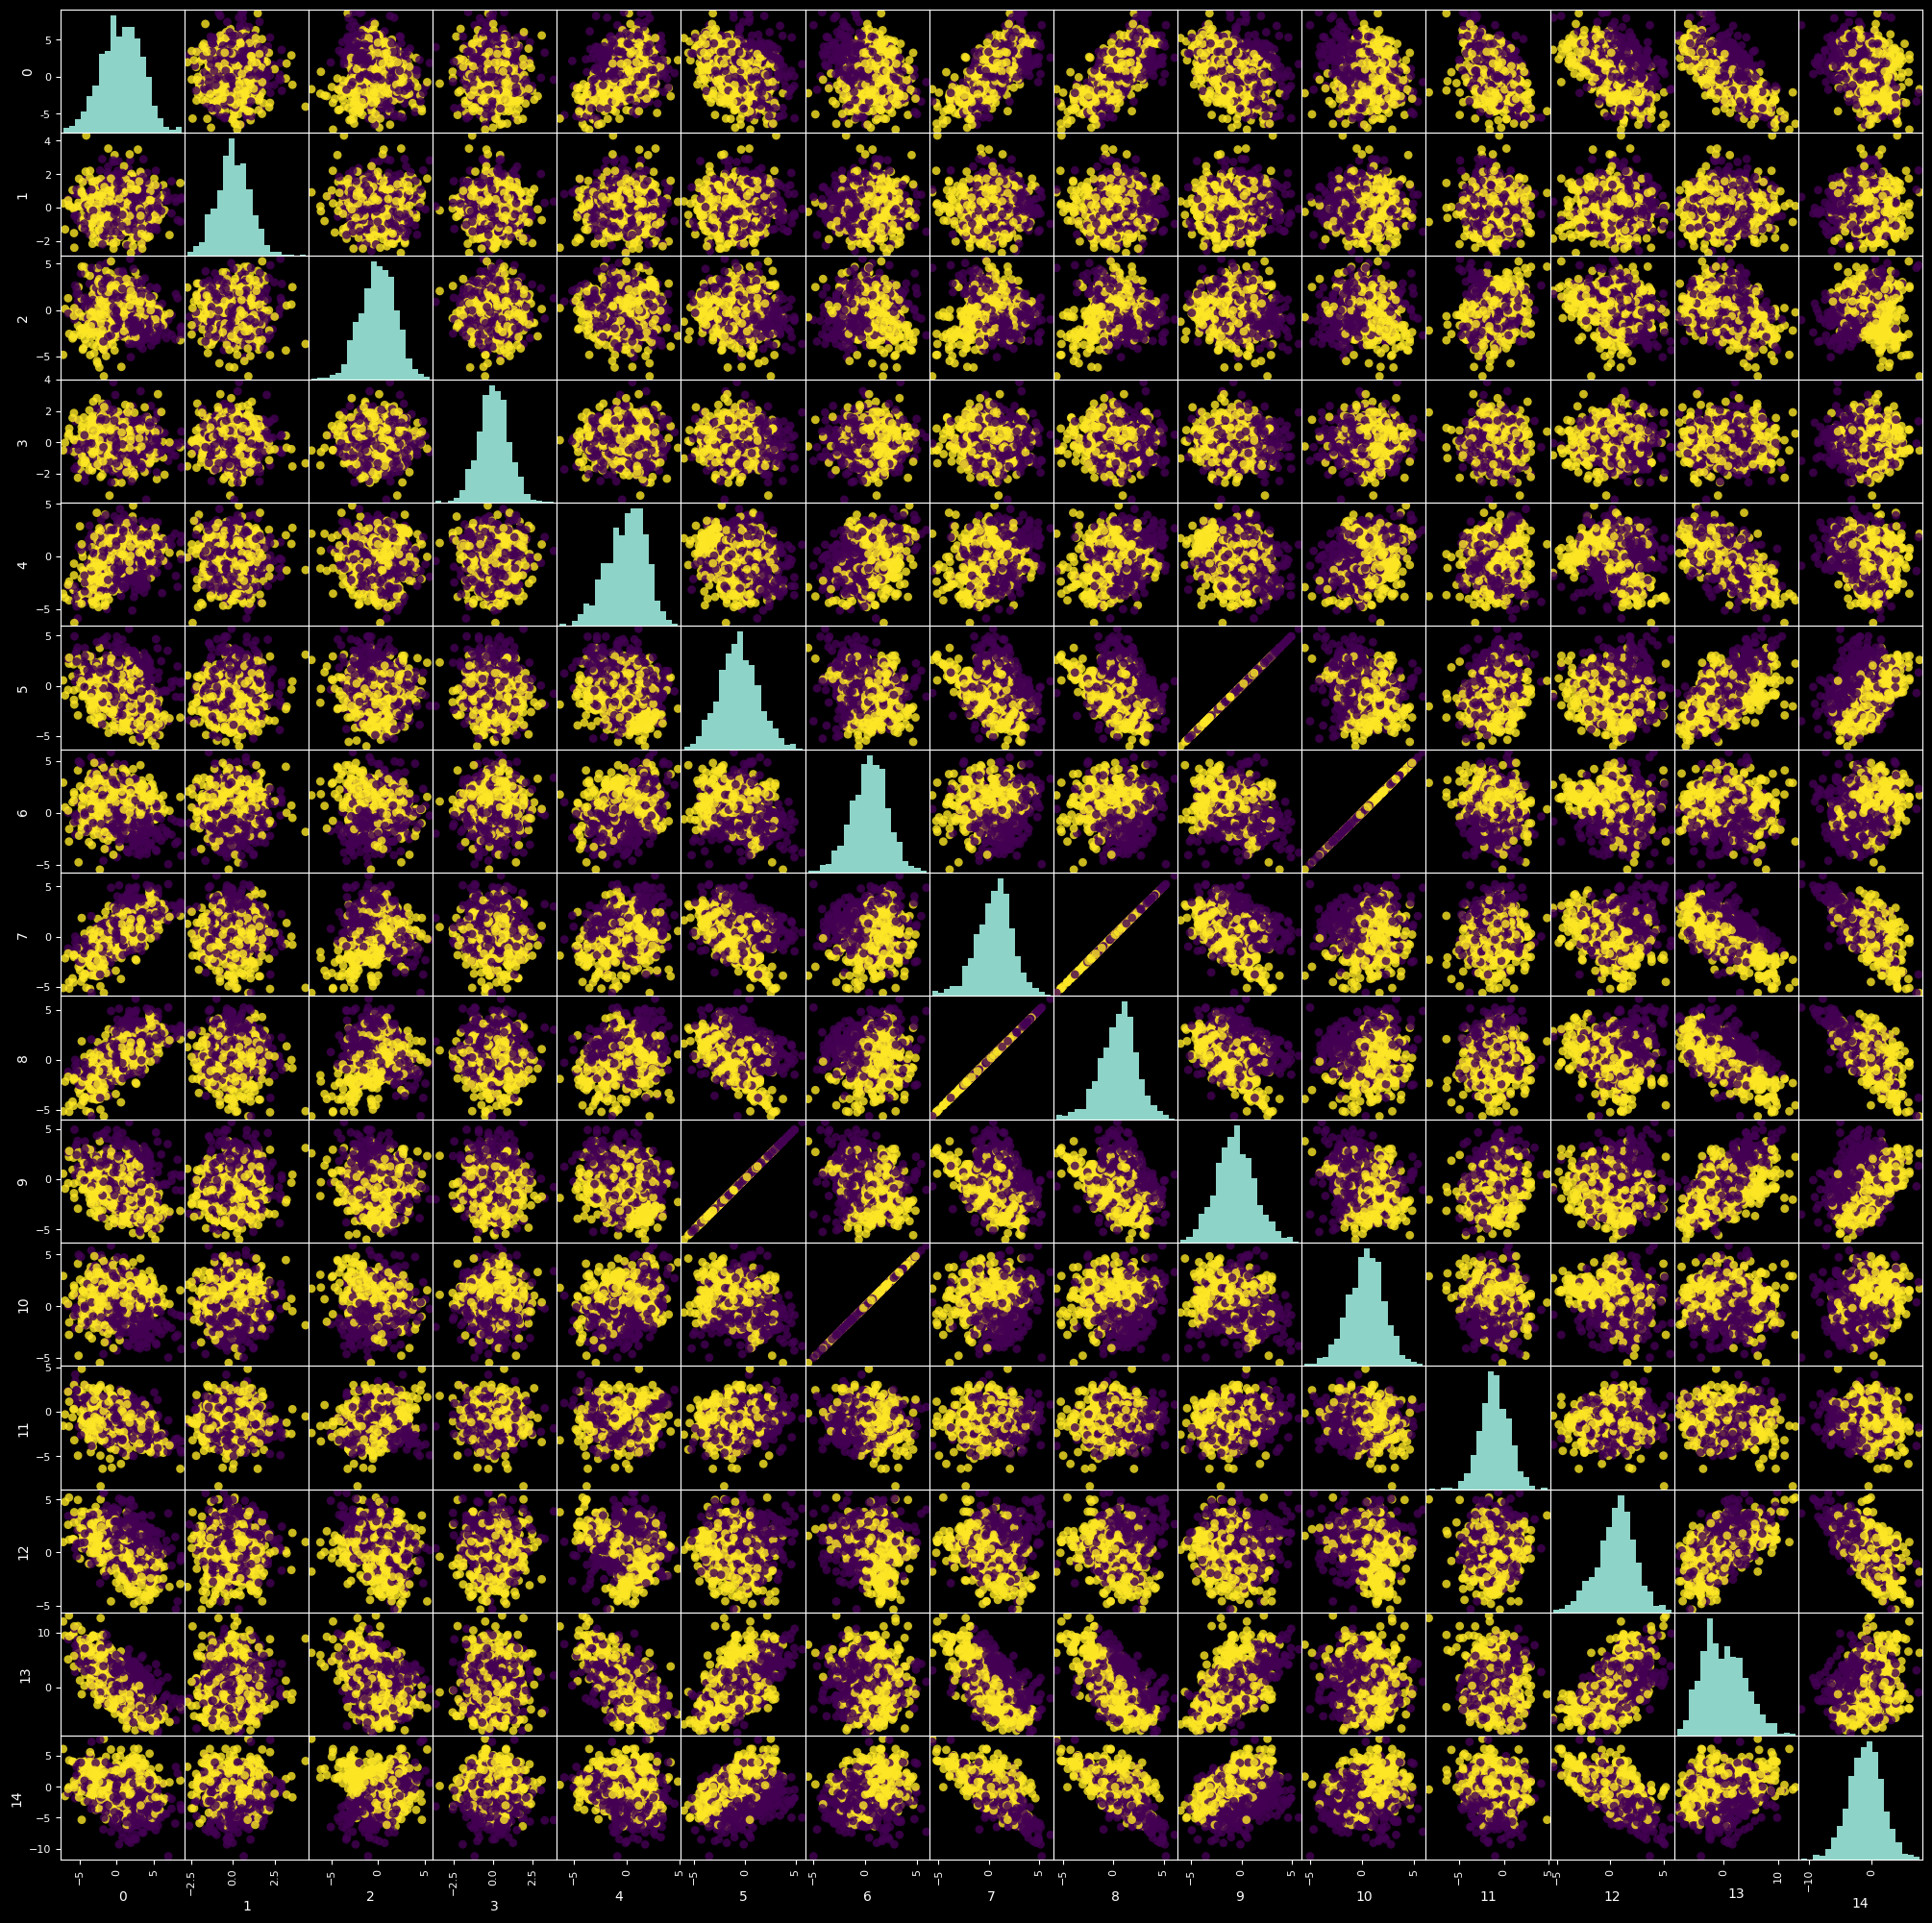

In [23]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd

x, y = make_classification(n_samples=1000, n_features=15, n_informative=7, 
                           n_redundant=3, n_repeated=3, random_state=17)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, stratify=y, random_state=17)

features = pd.DataFrame(x)
targets = pd.Series(y)

scat_mtrx = pd.plotting.scatter_matrix(features, c=targets, figsize=(25, 25), marker='o',
                                       hist_kwds={'bins': 20}, s=40, alpha=.8)

También definiremos de antemano los parámetros del algoritmo:
- clasificación binaria - 'objetivo': 'binario:logístico'
- profundidad del árbol - 'max_depth': 3
- paso de descenso de gradiente (tasa de aprendizaje) - 'eta': 0.1
- número de iteraciones de bousting - num_rounds = 60

In [24]:
import xgboost as xgb

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test, y_test)

params = {'objective': 'binary:logistic',
          'max_depth': 3,
          'eta': 0.1}

num_rounds = 60

Utilice el método train de la biblioteca xgboost para entrenar el modelo.

In [25]:
model = xgb.train(params, dtrain, num_boost_round=num_rounds)

In [26]:
# Crear una lista para evaluar la calidad del modelo
evals = [(dtest, 'test'), (dtrain, 'train')]

# Entrenamiento de un modelo XGBoost mediante evaluación de calidad
model = xgb.train(params, dtrain, num_boost_round=num_rounds, evals=evals)

[0]	test-logloss:0.66218	train-logloss:0.65393
[1]	test-logloss:0.63720	train-logloss:0.61917
[2]	test-logloss:0.61560	train-logloss:0.59160
[3]	test-logloss:0.59857	train-logloss:0.56560
[4]	test-logloss:0.57896	train-logloss:0.54453
[5]	test-logloss:0.56461	train-logloss:0.52541
[6]	test-logloss:0.55427	train-logloss:0.50501
[7]	test-logloss:0.54510	train-logloss:0.48785
[8]	test-logloss:0.53807	train-logloss:0.47188
[9]	test-logloss:0.52503	train-logloss:0.45870
[10]	test-logloss:0.51390	train-logloss:0.44352
[11]	test-logloss:0.50625	train-logloss:0.43231
[12]	test-logloss:0.49790	train-logloss:0.42220
[13]	test-logloss:0.48893	train-logloss:0.41076
[14]	test-logloss:0.47963	train-logloss:0.40002
[15]	test-logloss:0.47573	train-logloss:0.39206
[16]	test-logloss:0.46904	train-logloss:0.38432
[17]	test-logloss:0.46636	train-logloss:0.37817
[18]	test-logloss:0.46102	train-logloss:0.37129
[19]	test-logloss:0.45686	train-logloss:0.36514
[20]	test-logloss:0.45077	train-logloss:0.35970
[2

[24]	test-logloss:0.43892	train-logloss:0.34102
[25]	test-logloss:0.43353	train-logloss:0.33506
[26]	test-logloss:0.43012	train-logloss:0.33073
[27]	test-logloss:0.42788	train-logloss:0.32700
[28]	test-logloss:0.42839	train-logloss:0.32461
[29]	test-logloss:0.42622	train-logloss:0.32106
[30]	test-logloss:0.42125	train-logloss:0.31645
[31]	test-logloss:0.42083	train-logloss:0.31349
[32]	test-logloss:0.42207	train-logloss:0.31103
[33]	test-logloss:0.42075	train-logloss:0.30832
[34]	test-logloss:0.41899	train-logloss:0.30449
[35]	test-logloss:0.41786	train-logloss:0.30286
[36]	test-logloss:0.41590	train-logloss:0.29970
[37]	test-logloss:0.41525	train-logloss:0.29738
[38]	test-logloss:0.41429	train-logloss:0.29489
[39]	test-logloss:0.41379	train-logloss:0.29349
[40]	test-logloss:0.40732	train-logloss:0.28793
[41]	test-logloss:0.40256	train-logloss:0.28181
[42]	test-logloss:0.40298	train-logloss:0.27969
[43]	test-logloss:0.40269	train-logloss:0.27729
[44]	test-logloss:0.40182	train-logloss:

Utilicar el método plot_importance de la biblioteca XGBoost

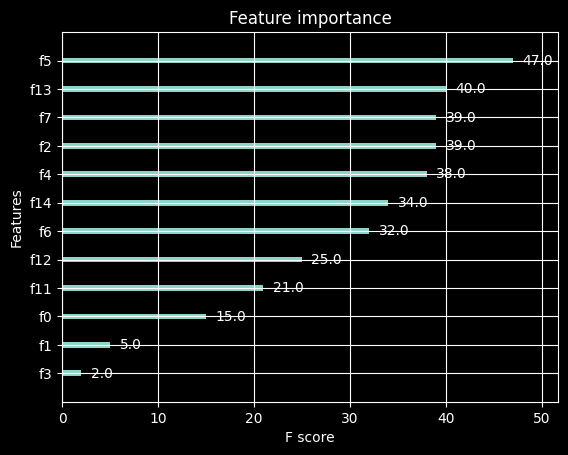

In [27]:
import matplotlib.pyplot as plt

xgb.plot_importance(model)
plt.show()

**Muestras desequilibradas**

Generar una muestra desequilibrada

In [28]:
x, y = make_classification(n_samples=1000, n_features=7, n_informative=3, n_redundant=3, 
                           n_classes=2, weights=[.9, .1], random_state=20)

print(f'There are {sum(y)} positive instances')

There are 104 positive instances


In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, stratify=y, random_state=17)

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test, y_test)

In [30]:
params = {'objective': 'binary:logistic', 
          'max_depth': 1, 
          'silent': 1, 
          'eta': 1}

num_rounds = 30

In [31]:
# Entrenamiento modelo
model = xgb.train(params, dtrain, num_boost_round=num_rounds, evals=[(dtest, 'test'), (dtrain, 'train')])

# Hacer predicciones para datos de prueba
predictions_prob = model.predict(dtest)

# Creando una matriz binaria
predictions_binary = (predictions_prob > 0.5).astype(int)

# Salida de matriz binaria
print(predictions_binary)

[0]	test-logloss:0.31470	train-logloss:0.29773
[1]	test-logloss:0.27868	train-logloss:0.25908
[2]	test-logloss:0.27898	train-logloss:0.24361
[3]	test-logloss:0.27163	train-logloss:0.23343
[4]	test-logloss:0.25738	train-logloss:0.22304
[5]	test-logloss:0.24147	train-logloss:0.21063
[6]	test-logloss:0.23687	train-logloss:0.20400
[7]	test-logloss:0.23644	train-logloss:0.19658
[8]	test-logloss:0.22932	train-logloss:0.18955
[9]	test-logloss:0.22597	train-logloss:0.18258
[10]	test-logloss:0.21775	train-logloss:0.17771
[11]	test-logloss:0.21105	train-logloss:0.17260
[12]	test-logloss:0.20293	train-logloss:0.16686
[13]	test-logloss:0.20741	train-logloss:0.16294
[14]	test-logloss:0.20079	train-logloss:0.15942
[15]	test-logloss:0.21082	train-logloss:0.15664
[16]	test-logloss:0.20795	train-logloss:0.15373
[17]	test-logloss:0.20512	train-logloss:0.15123
[18]	test-logloss:0.19664	train-logloss:0.14718
[19]	test-logloss:0.19899	train-logloss:0.14551
[20]	test-logloss:0.20340	train-logloss:0.14319
[2

C:\Users\Ульяна\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [19:22:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Genere la matriz de error, la precisión y la recuperación de las predicciones resultantes

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

y_true = y_test

conf_matrix = confusion_matrix(y_true, predictions_binary)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_true, predictions_binary)
print("\nAccuracy:", accuracy)

recall = recall_score(y_true, predictions_binary)
print("Recall (Sensitivity):", recall)

Confusion Matrix:
[[264   5]
 [ 17  14]]

Accuracy: 0.9266666666666666
Recall (Sensitivity): 0.45161290322580644


Se puede ver que la integridad es mucho menor que la precisión, es decir. el algoritmo no reconoce objetos de una clase representada por menos instancias.

Repita lo que hizo antes: cree objetos DMatrix - especifique pesos para los datos de entrenamiento, y para los datos de prueba deje sólo los datos propiamente dichos; entrene el modelo y obtenga sus predicciones de la misma forma que en el caso anterior. Obtenga la matriz de error, la precisión y la integridad.

In [33]:
import numpy as np

# Configurando las escalas
weights = np.zeros(len(y_train)) # Se crea una matriz de ceros con una longitud igual al número de muestras en los datos de entrenamiento
weights[y_train == 0] = 1
weights[y_train == 1] = 5

dtrain_weighted = xgb.DMatrix(x_train, y_train, weight=weights)

dtest = xgb.DMatrix(x_test, y_test)

model_weighted = xgb.train(params, dtrain_weighted, num_boost_round=num_rounds, evals=[(dtest, 'test'), (dtrain_weighted, 'train')])

predictions_prob_weighted = model_weighted.predict(dtest)
predictions_binary_weighted = (predictions_prob_weighted > 0.5).astype(int)
'''Esto crea predicciones binarias. 
Si la probabilidad de predicción para una muestra particular
es mayor que 0,5, entonces el elemento correspondiente 
en predictions_binary_weighted se establece en 1 
(Verdadero); de lo contrario, en 0 (Falso).'''

conf_matrix_weighted = confusion_matrix(y_test, predictions_binary_weighted)
accuracy_weighted = accuracy_score(y_test, predictions_binary_weighted)
recall_weighted = recall_score(y_test, predictions_binary_weighted)

print("Confusion Matrix (Weighted):")
print(conf_matrix_weighted)
print("\nAccuracy (Weighted):", accuracy_weighted)
print("Recall (Sensitivity) (Weighted):", recall_weighted)


[0]	test-logloss:0.49157	train-logloss:0.54110
[1]	test-logloss:0.40292	train-logloss:0.46585
[2]	test-logloss:0.39126	train-logloss:0.42312
[3]	test-logloss:0.35310	train-logloss:0.38814
[4]	test-logloss:0.31701	train-logloss:0.37073
[5]	test-logloss:0.30599	train-logloss:0.35314
[6]	test-logloss:0.30103	train-logloss:0.33657
[7]	test-logloss:0.28721	train-logloss:0.32028
[8]	test-logloss:0.28030	train-logloss:0.31057
[9]	test-logloss:0.27492	train-logloss:0.29860
[10]	test-logloss:0.27696	train-logloss:0.28851
[11]	test-logloss:0.27368	train-logloss:0.28058
[12]	test-logloss:0.26918	train-logloss:0.27252
[13]	test-logloss:0.25635	train-logloss:0.26483
[14]	test-logloss:0.25351	train-logloss:0.25745
[15]	test-logloss:0.25895	train-logloss:0.25193
[16]	test-logloss:0.25071	train-logloss:0.24496
[17]	test-logloss:0.24835	train-logloss:0.24024
[18]	test-logloss:0.25559	train-logloss:0.23198
[19]	test-logloss:0.24938	train-logloss:0.22541
[20]	test-logloss:0.23943	train-logloss:0.22121
[2

C:\Users\Ульяна\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [19:22:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix (Weighted):
[[252  17]
 [  8  23]]

Accuracy (Weighted): 0.9166666666666666
Recall (Sensitivity) (Weighted): 0.7419354838709677


Podemos ver que el valor de recuperación ha aumentado, pero la precisión ha disminuido

**Stacking**

Ejecute las siguientes 4 celdas:

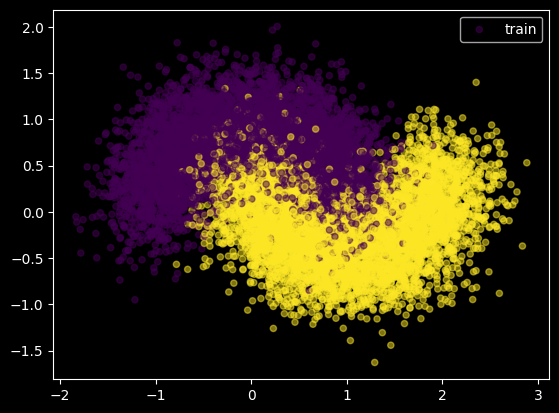

In [34]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

x, y = make_moons(15000, noise=0.3, random_state=17)

train, test, train_true, test_true = train_test_split(x, 
                                                      y,
                                                      train_size=0.7,
                                                      random_state=17)

x_train, valid, y_train, valid_true = train_test_split(train, 
                                                      train_true, 
                                                      train_size=0.6, 
                                                      random_state=17)

plt.scatter(train[:, 0], train[:, 1], c=train_true, s=20, alpha=0.5, label='train')
plt.legend()

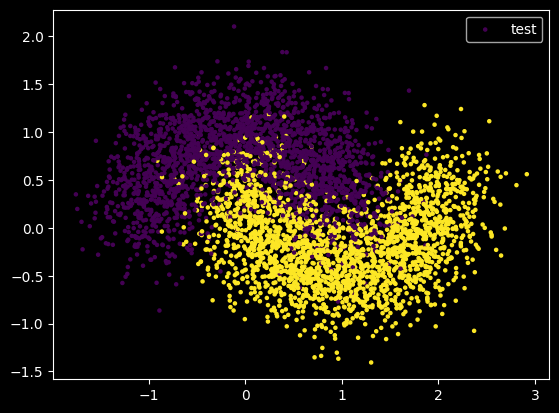

In [35]:
plt.scatter(test[:, 0], test[:, 1], c=test_true, s=5, alpha=1.0, label='test')
plt.legend()

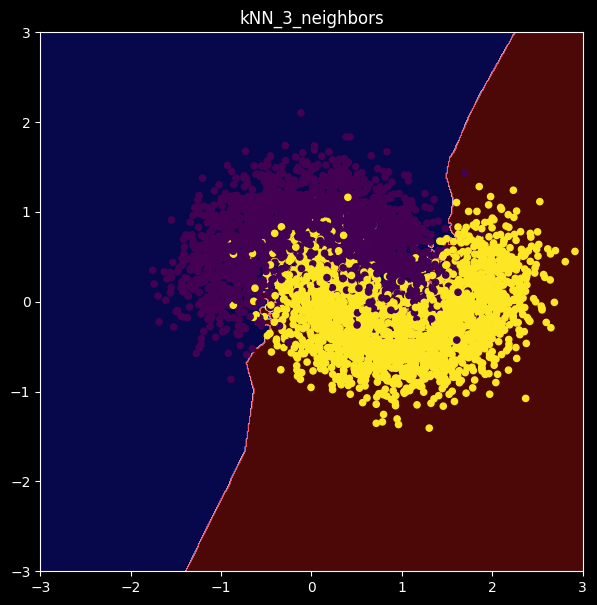

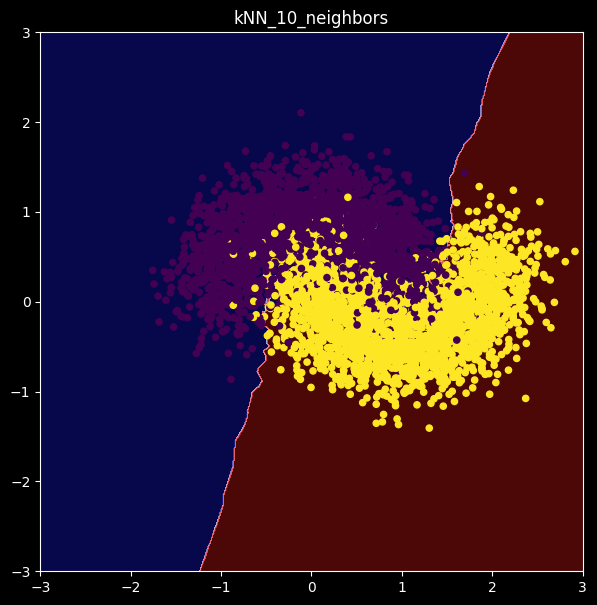

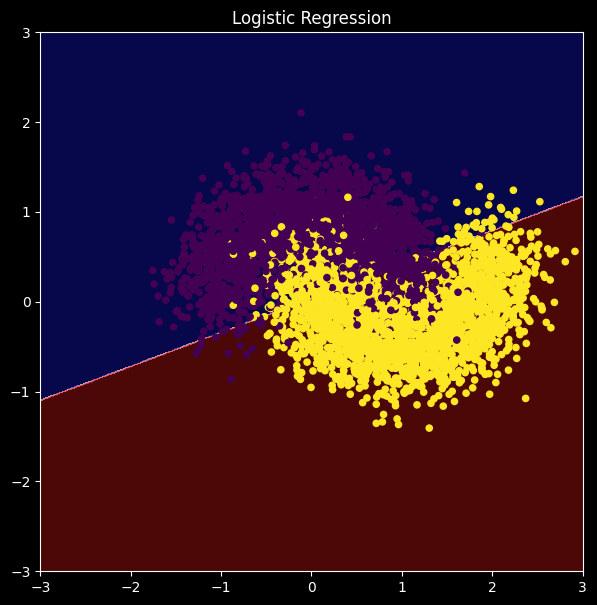

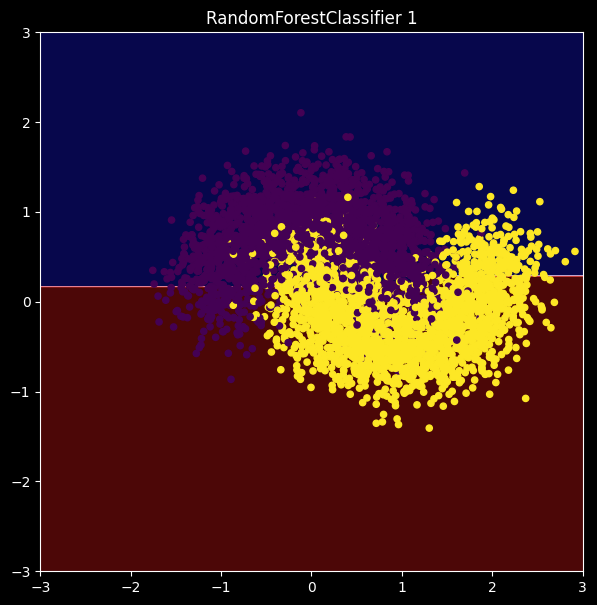

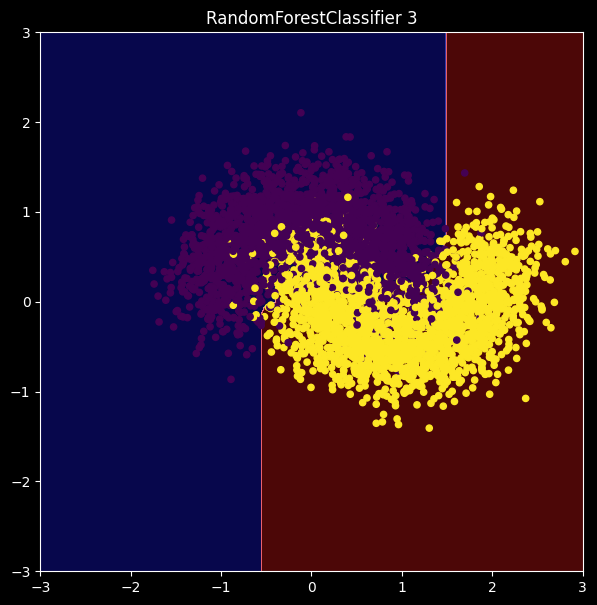

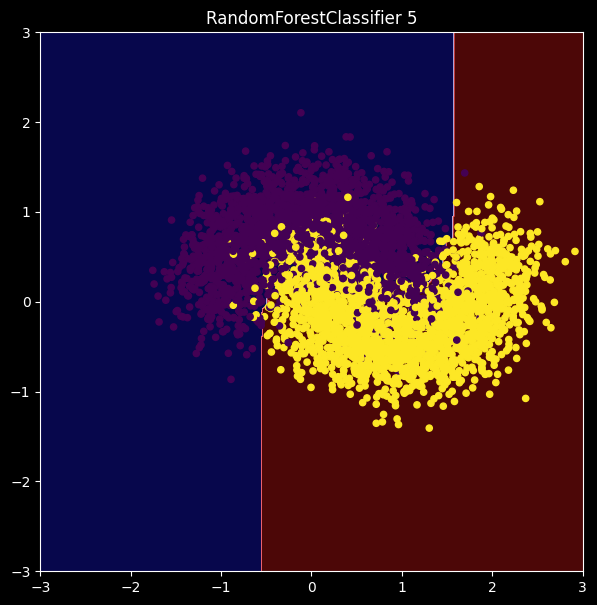

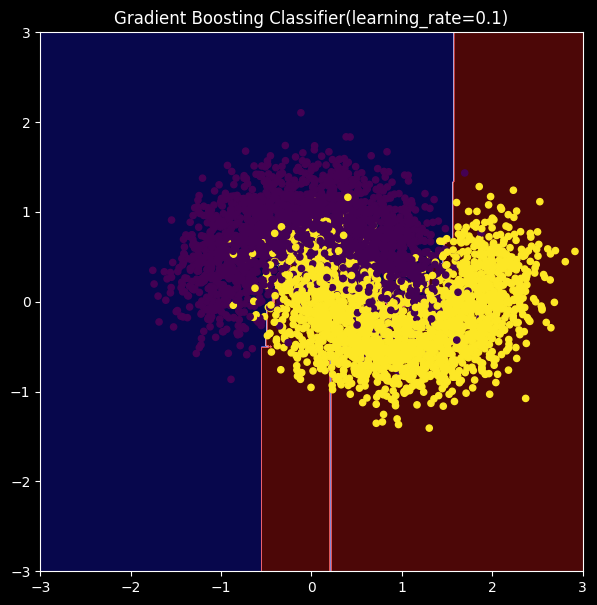

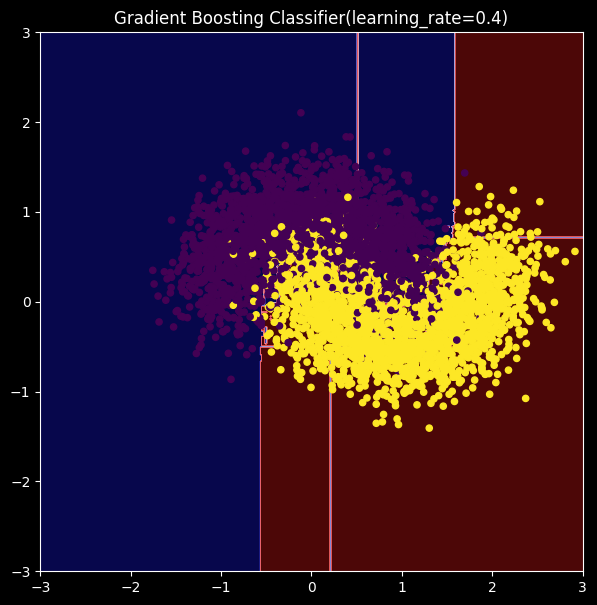

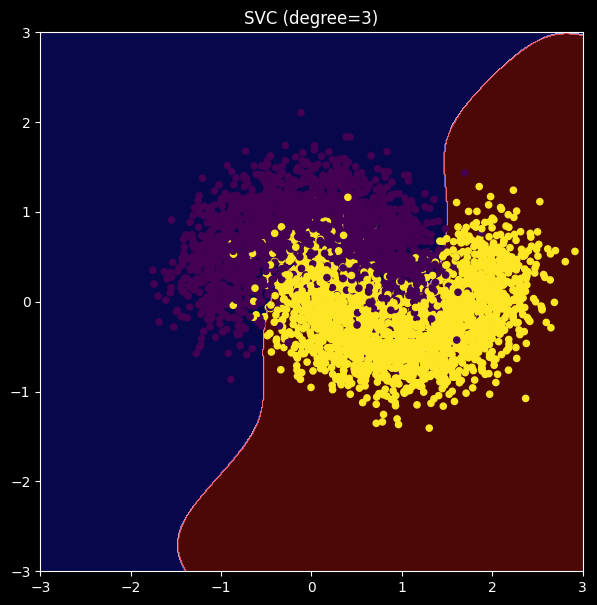

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

def plot(alg, data, targets, label): # La función meshgrid se utiliza para crear una cuadrícula bidimensional utilizando valores de matrices unidimensionales.
    xx, yy = np.meshgrid(np.linspace(-3., 3., 500), np.linspace(-3., 3., 500)) # Esta parte del código crea una matriz unidimensional distribuida uniformemente de 500 números que van desde -3 a 3 inclusive.
    Z = alg.predict(np.c_[xx.ravel(), yy.ravel()]) # xx.ravel() y yy.ravel() se utilizan para convertir las matrices bidimensionales xx e yy en matrices unidimensionales que contienen todos los puntos de la cuadrícula en secuencia.
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(7, 7))
    plt.contourf(xx, yy, Z, levels=10, cmap=plt.cm.bwr, alpha=0.3)
    
    plt.scatter(data[:, 0], data[:, 1], s=20, c=targets)
    
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))
    plt.title(label)
    

knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(x_train, y_train)
plot(knn1, test, test_true, 'kNN_3_neighbors')

knn2 = KNeighborsClassifier(n_neighbors=10)
knn2.fit(x_train, y_train)
plot(knn2, test, test_true, 'kNN_10_neighbors')

lr = LogisticRegression(C=10, random_state=17)
lr.fit(x_train, y_train)
plot(lr, test, test_true, 'Logistic Regression')

rf1 = RandomForestClassifier(n_estimators=100, max_depth=1, random_state=17)
rf1.fit(x_train, y_train)
plot(rf1, test, test_true, 'RandomForestClassifier 1')

rf2 = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=17)
rf2.fit(x_train, y_train)
plot(rf2, test, test_true, 'RandomForestClassifier 3')

rf3 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=17)
rf3.fit(x_train, y_train)
plot(rf3, test, test_true, 'RandomForestClassifier 5')

gb1 = GradientBoostingClassifier(learning_rate=0.1, random_state=17)
gb1.fit(x_train, y_train)
plot(gb1, test, test_true, 'Gradient Boosting Classifier(learning_rate=0.1)')

gb2 = GradientBoostingClassifier(learning_rate=0.4, random_state=17)
gb2.fit(x_train, y_train)
plot(gb2, test, test_true, 'Gradient Boosting Classifier(learning_rate=0.4)')

svc = SVC(degree=3, random_state=17)
svc.fit(x_train, y_train)
plot(svc, test, test_true, 'SVC (degree=3)')

0 auc: 0.8971313863234087
1 auc: 0.9139757690299333
2 auc: 0.8522046357837013
3 auc: 0.8215518046981363
4 auc: 0.8926628837592676
5 auc: 0.9040736424237767
6 auc: 0.9173543856917827
7 auc: 0.9066244476235391
8 auc: 0.9159963007298768
Stacking AUC: 0.9155027749465133


Text(0, 0.5, 'AUC')

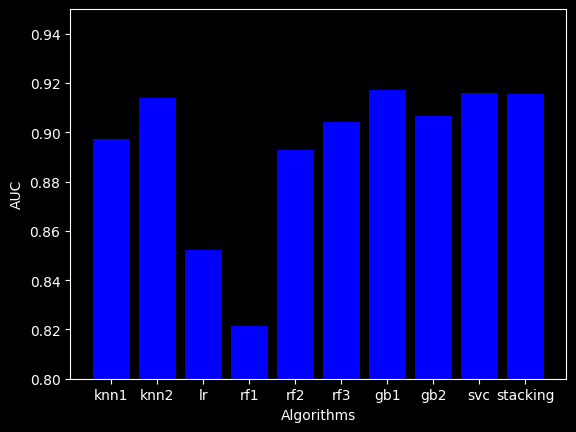

In [37]:
models = [knn1, knn2, lr, rf1, rf2, rf3, gb1, gb2, svc]
meta_mtrx = np.empty((valid.shape[0], len(models))) # (número de objetos, 4 algoritmos)

for n, model in enumerate(models):
    meta_mtrx[:, n] = model.predict(valid)
    predicted = model.predict(test)
    print(f'{n} auc: {roc_auc_score(test_true, predicted)}')
    
meta = GradientBoostingClassifier(n_estimators=60, random_state=17)
meta_model = meta.fit(meta_mtrx, valid_true)

meta_mtrx_test = np.empty((test.shape[0], len(models))) 

for n, model in enumerate(models):
    meta_mtrx_test[:, n] = model.predict(test)
    
meta_predict = meta.predict(meta_mtrx_test)
print(f'Stacking AUC: {roc_auc_score(test_true, meta_predict)}')


# representa los valores AUC de todos los clasificadores en el eje yy y los propios algoritmos en el eje xx.

alg = ['knn1', 'knn2', 'lr', 'rf1', 'rf2', 'rf3', 'gb1', 'gb2', 'svc', 'stacking'] # nombres de algoritmos
auc = [] # valores auc para alg
for model in models:
    predicted = model.predict(test)
    auc.append(roc_auc_score(test_true, predicted))
auc.append(roc_auc_score(test_true, meta_predict))
    
plt.bar(np.arange(len(auc)), auc, color='blue', label='алгоритмы')
plt.xticks(np.arange(len(auc)), alg)
plt.ylim([0.8, 0.95])
plt.xlabel('Algorithms')
plt.ylabel('AUC')

construir un metamodelo sin metacaracterísticas de los dos mejores algoritmos (gb1 y svc1)

In [38]:
models_to_consider = [gb1, svc]

meta_mtrx_without_gb_svc = np.empty((valid.shape[0], len(models_to_consider)))

for n, model in enumerate(models_to_consider):
    meta_mtrx_without_gb_svc[:, n] = model.predict(valid)
    predicted = model.predict(test)
    print(f'{n} auc: {roc_auc_score(test_true, predicted)}')

meta_without_gb_svc = GradientBoostingClassifier(n_estimators=60, random_state=17)
meta_model_without_gb_svc = meta_without_gb_svc.fit(meta_mtrx_without_gb_svc, valid_true)

meta_mtrx_test_without_gb_svc = np.empty((test.shape[0], len(models_to_consider)))

for n, model in enumerate(models_to_consider):
    meta_mtrx_test_without_gb_svc[:, n] = model.predict(test)

meta_predict_without_gb_svc = meta_without_gb_svc.predict(meta_mtrx_test_without_gb_svc)
print(f'Stacking AUC (without gb1 and svc): {roc_auc_score(test_true, meta_predict_without_gb_svc)}')


0 auc: 0.9173543856917827
1 auc: 0.9159963007298768
Stacking AUC (without gb1 and svc): 0.9159963007298768
